# Initial filtering of the data

In [37]:
import numpy as np
import pandas as pd
import scanpy.api as sc

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/mnt/other")
from jp_single import *

scanpy==1.4 anndata==0.6.19 numpy==1.16.2 scipy==1.2.1 pandas==0.25.2 scikit-learn==0.20.3 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
input_file= '/mnt/PROJECTS/Fetal_paper/outputfiles/fetal_gut_paper01_raw.h5ad'

In [39]:
merge= sc.read(input_file)

In [40]:
merge

AnnData object with n_obs × n_vars = 65306 × 33694 
    obs: '# cells', 'CRL', 'Fraction', 'PCW', 'batch', 'donor_num', 'purification', 'region', 'sample', 'tar_cells', 'viability %'
    var: 'gene_ids-4918STDY7321513', 'gene_ids-4918STDY7321514', 'gene_ids-4918STDY7321515', 'gene_ids-4918STDY7317585', 'gene_ids-4918STDY7317586', 'gene_ids-4918STDY7317587', 'gene_ids-4918STDY7421297', 'gene_ids-4918STDY7421298', 'gene_ids-4918STDY7421299', 'gene_ids-4918STDY7426904', 'gene_ids-4918STDY7426905', 'gene_ids-4918STDY7426906', 'gene_ids-4918STDY7426907', 'gene_ids-4918STDY7426908', 'gene_ids-4918STDY7426909', 'gene_ids-4918STDY7693757', 'gene_ids-4918STDY7693758', 'gene_ids-4918STDY7693759', 'gene_ids-4918STDY7693760', 'gene_ids-4918STDY7693761', 'gene_ids-4918STDY7693762', 'gene_ids-4918STDY7693763', 'gene_ids-4918STDY7717783', 'gene_ids-4918STDY7717784', 'gene_ids-4918STDY7717785', 'gene_ids-4918STDY7717787', 'gene_ids-4918STDY7717788', 'gene_ids-4918STDY7717789', 'gene_ids-4918STDY771897

In [41]:
scrub=pd.read_csv("/mnt/PROJECTS/Fetal_paper/outputfiles/all_scores_together2.csv")

In [42]:
scrub.shape

(65306, 4)

In [43]:
scrub=scrub.set_index("barcode")

In [44]:
df1=pd.DataFrame(merge.obs)

In [45]:
merge.obs=df1.join(scrub)

# Remove cells with less than 200 genes and genes in less than 3 cells

In [46]:
sc.pp.filter_cells(merge, min_genes=200)
sc.pp.filter_genes(merge, min_cells=3)

filtered out 16 cells that have less than 200 genes expressed
filtered out 6937 genes that are detected in less than 3 cells


In [47]:
merge.var_names

Index(['RP11-34P13.7', 'RP11-34P13.8', 'FO538757.3', 'FO538757.2',
       'AP006222.2', 'RP4-669L17.10', 'RP5-857K21.4', 'RP11-206L10.4',
       'RP11-206L10.9', 'FAM87B',
       ...
       'BX004987.4', 'AC145212.4', 'AC145212.2', 'AC011043.1', 'AL592183.1',
       'AC007325.4', 'AC007325.2', 'AL354822.1', 'AC004556.1', 'AC240274.1'],
      dtype='object', name='index', length=26757)

In [48]:
mito_genes = merge.var_names.isin([name for name in merge.var_names if name.startswith('MT-')])
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary, as X is sparse - it transform to a dense array after summing
merge.obs['percent_mito'] = np.sum(
    merge[:, mito_genes].X, axis=1).A1 / np.sum(merge.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
merge.obs['n_counts'] = merge.X.sum(axis=1).A1
mito_genes = merge.var_names.isin([name for name in merge.var_names if name.startswith('RP')])
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary, as X is sparse - it transform to a dense array after summing
merge.obs['percent_rpl'] = np.sum(
    merge[:, mito_genes].X, axis=1).A1 / np.sum(merge.X, axis=1).A1

In [49]:
[name for name in merge.var_names if name.startswith('RP')]


['RP11-34P13.7',
 'RP11-34P13.8',
 'RP4-669L17.10',
 'RP5-857K21.4',
 'RP11-206L10.4',
 'RP11-206L10.9',
 'RP11-54O7.16',
 'RP11-54O7.1',
 'RP11-54O7.2',
 'RP11-54O7.3',
 'RP11-54O7.17',
 'RP11-54O7.11',
 'RP11-465B22.8',
 'RP5-902P8.12',
 'RP5-902P8.10',
 'RP4-758J18.13',
 'RP4-758J18.7',
 'RP4-758J18.10',
 'RP5-832C2.5',
 'RP11-345P4.9',
 'RP11-345P4.10',
 'RP11-345P4.7',
 'RP1-140A9.1',
 'RP11-547D24.1',
 'RP11-547D24.3',
 'RP5-892K4.1',
 'RP11-181G12.2',
 'RP11-181G12.4',
 'RP3-395M20.2',
 'RP3-395M20.12',
 'RP3-395M20.8',
 'RP3-395M20.9',
 'RP13-436F16.1',
 'RP1-163G9.2',
 'RP11-22L13.1',
 'RP11-168F9.2',
 'RP11-46F15.2',
 'RP1-286D6.5',
 'RP5-1166F10.1',
 'RPL22',
 'RP1-120G22.11',
 'RP1-202O8.3',
 'RP11-242F24.1',
 'RP11-312B8.1',
 'RP4-549F15.1',
 'RP11-338N10.1',
 'RP11-338N10.2',
 'RP11-338N10.3',
 'RP3-467L1.4',
 'RP11-431K24.1',
 'RP11-431K24.3',
 'RP5-1115A15.1',
 'RP4-633I8.4',
 'RP3-510D11.2',
 'RP11-84A14.5',
 'RP4-736L20.3',
 'RP5-1113E3.3',
 'RP4-734G22.3',
 'RP4-635E

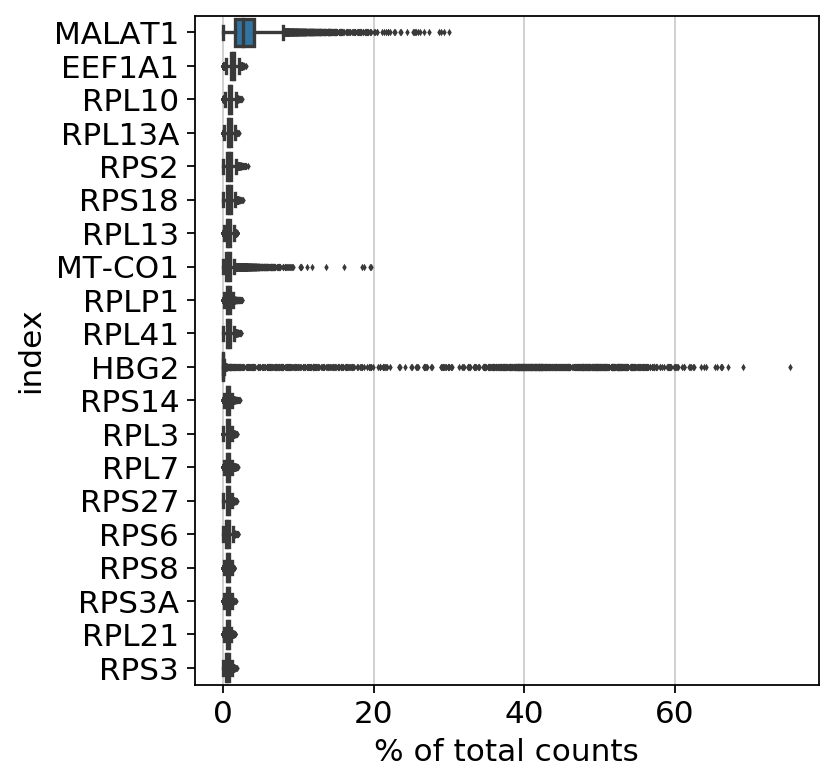

In [50]:
sc.pl.highest_expr_genes(merge, n_top=20)

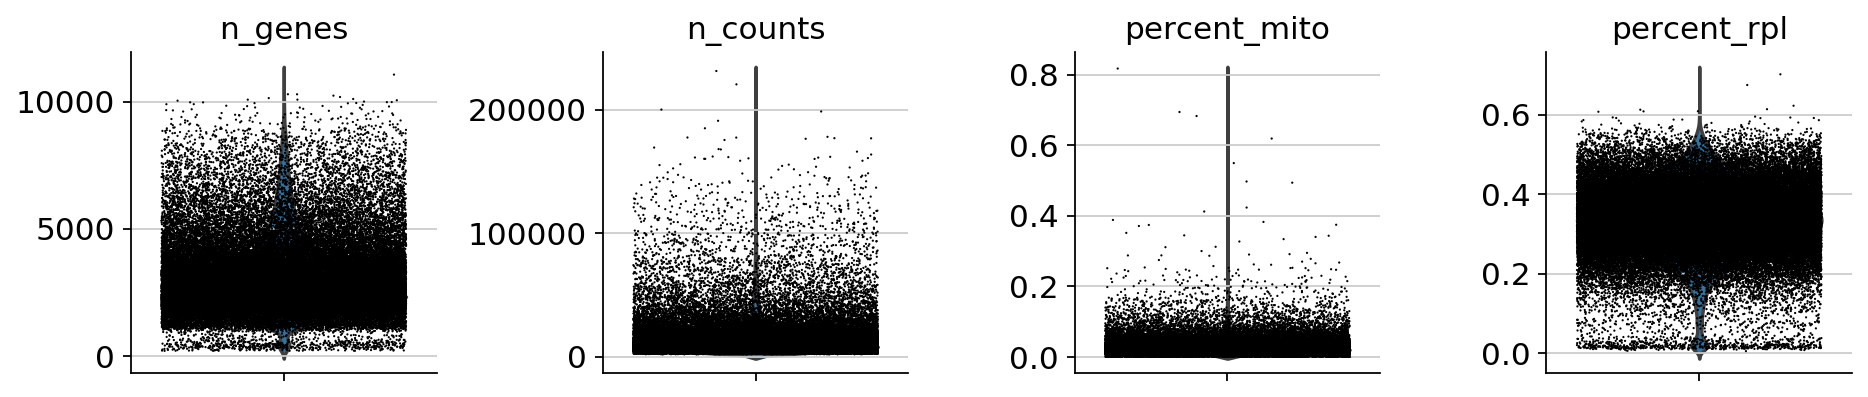

In [51]:
sc.pl.violin(merge, ['n_genes', 'n_counts','percent_mito', 'percent_rpl'],
             jitter=0.4, multi_panel=True)

In [52]:
merge

AnnData object with n_obs × n_vars = 65290 × 26757 
    obs: '# cells', 'CRL', 'Fraction', 'PCW', 'batch', 'donor_num', 'purification', 'region', 'sample', 'tar_cells', 'viability %', 'Unnamed: 0', 'doublet_scores', 'predicted_doublets', 'n_genes', 'percent_mito', 'n_counts', 'percent_rpl'
    var: 'gene_ids-4918STDY7321513', 'gene_ids-4918STDY7321514', 'gene_ids-4918STDY7321515', 'gene_ids-4918STDY7317585', 'gene_ids-4918STDY7317586', 'gene_ids-4918STDY7317587', 'gene_ids-4918STDY7421297', 'gene_ids-4918STDY7421298', 'gene_ids-4918STDY7421299', 'gene_ids-4918STDY7426904', 'gene_ids-4918STDY7426905', 'gene_ids-4918STDY7426906', 'gene_ids-4918STDY7426907', 'gene_ids-4918STDY7426908', 'gene_ids-4918STDY7426909', 'gene_ids-4918STDY7693757', 'gene_ids-4918STDY7693758', 'gene_ids-4918STDY7693759', 'gene_ids-4918STDY7693760', 'gene_ids-4918STDY7693761', 'gene_ids-4918STDY7693762', 'gene_ids-4918STDY7693763', 'gene_ids-4918STDY7717783', 'gene_ids-4918STDY7717784', 'gene_ids-4918STDY7717785', 

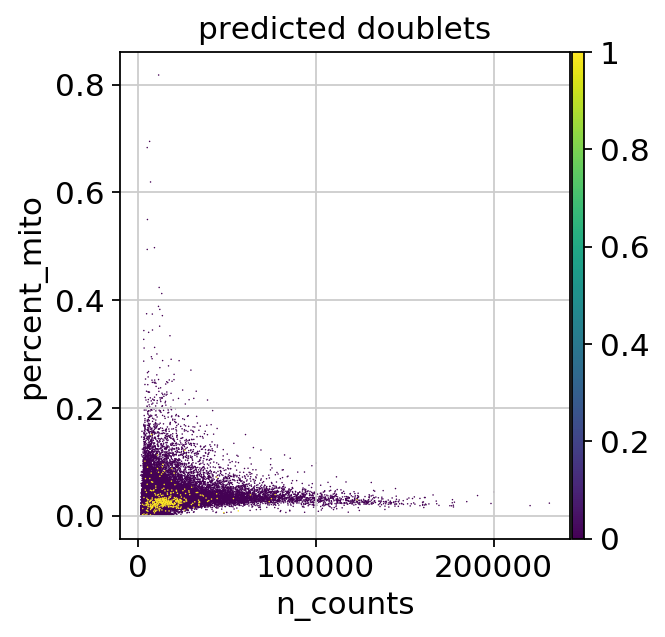

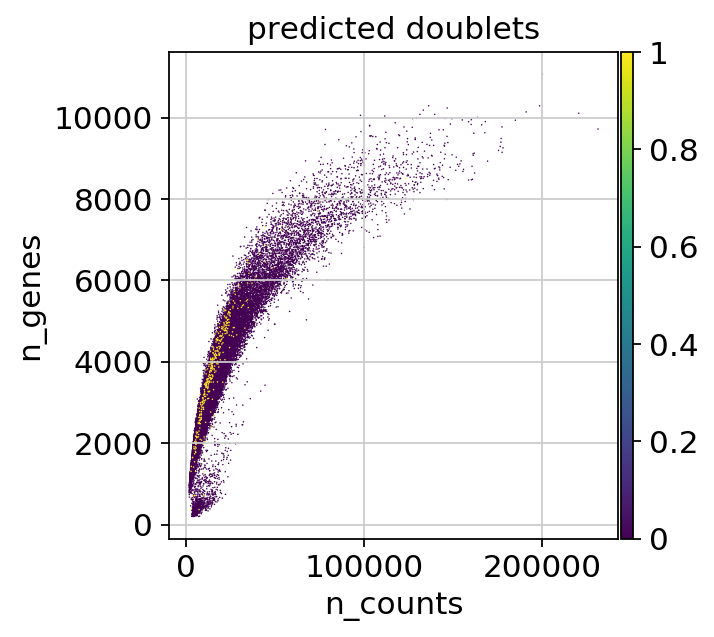

In [53]:
sc.pl.scatter(merge, x='n_counts', y='percent_mito', color="predicted_doublets")
sc.pl.scatter(merge, x='n_counts', y='n_genes', color="predicted_doublets")

Here I filter on the number of counts because in my opinion if two same cells are captured in one droplet the number of genes may be the same but number of counts will be different.

In [54]:
merge = merge[merge.obs['n_genes'] < 9000, :]
merge = merge[merge.obs['percent_mito'] < 0.2, :]

In [55]:
merge = merge[merge.obs["predicted_doublets"].isin([False])]

In [56]:
merge.obs["predicted_doublets"].value_counts()

False    64691
Name: predicted_doublets, dtype: int64

Normalise per cell and store normalised and log transformed counts in the .raw of Anndata

In [57]:
sc.pp.normalize_per_cell(merge, counts_per_cell_after=1e4)

In [58]:
sc.pp.log1p(merge)

In [59]:
merge.raw = merge

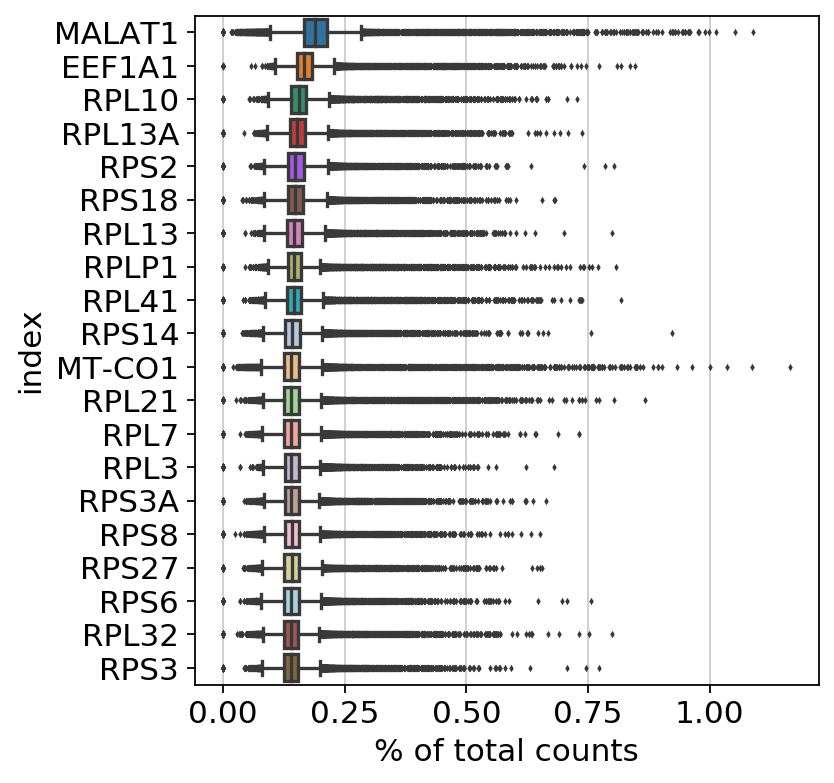

In [60]:
sc.pl.highest_expr_genes(merge, n_top=20)

In [61]:
merge.write('/mnt/PROJECTS/Fetal_paper/outputfiles/fetal_gut_paper01_qc.h5ad')

# Go to analysis files 